# Lab05: Neural Net

- Student ID: 18127231
- Student name: Doan Dinh Toan

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`). Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Implement a Neural Net model for classyfing images.
- Dataset: CIFAR-10. 
- Data description [here](https://www.cs.toronto.edu/~kriz/cifar.html). 
- Download `CIFAR-10 python version`, extract then copy folder `cifar-10-batches-py` to your notebook folder.

## Import

In [1]:
%matplotlib inline
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _pickle as cPickle

# ignore warning ...
import warnings
import math
warnings.filterwarnings('ignore')

## Define function
**Read CIFAR-10**

In [2]:
def unpickle(file):
#     fo = open(file, 'rb')
#     dict = cPickle.load(CIFAR-10)
#     return dict
    fo = open(file, 'rb')
    dict = cPickle.load(fo, encoding='latin1')
    fo.close()
    return dict
def read_data(containing_dir, num_train_batchs):
    # Read training data
    train_X_batchs = []
    train_Y_batchs = []
    for batch_idx in range(num_train_batchs):
        batch = unpickle(containing_dir + r'/data_batch_' + str(batch_idx + 1))
        train_X_batchs.append(batch['data'])
        train_Y_batchs.append(np.array(batch['labels']).reshape(-1, 1))
    train_X = np.vstack(train_X_batchs)
    train_X = train_X / 255. # Normalize to [0, 1]
    train_X = np.hstack([np.ones((len(train_X), 1)), train_X])
    train_Y = np.vstack(train_Y_batchs)
    
    # Read test data
    batch = unpickle(containing_dir + r'/test_batch')
    test_X = batch['data']
    test_X = test_X / 255. # Normalize to [0, 1]
    test_X = np.hstack([np.ones((len(test_X), 1)), test_X])
    test_Y = np.array(batch['labels']).reshape(-1, 1)
    
    return (train_X, train_Y, test_X, test_Y)

**TODO:**

**Compute ouput**

we use sigmoid activation function at hidden layers, softmax at last layes.

In [3]:

def sigmoid(x):
    '''
    Computes sigmoid function for each element of array S.
    '''
    return 1 / (1 + np.exp(-x))



def gradient_sigmoid(As, Ws ,mb_X,delta, i):
    '''
    Computes gradient vector for sigmoid layer.
    '''
    return delta, grad


def softmax(S):
    '''
    Computes softmax function for each row of array S.
    '''
    A = np.exp(S)
    A /=A.sum(axis=1, keepdims=True)

    return A

def gradient_softmax(As,mb_X,mb_Y):
    '''
    Computes gradient vector for softmaz layer
    '''
    return delta, grad

def compute_nnet_outputs(Ws, X, need_all_layer_outputs):
    '''
    Computes the outputs of Neural Net by forward propagating X through the net.

    
    Parameters
    ----------
    Ws : list of numpy arrays
        Ws[l-1] is W of layer l with l >= 1 (layer 0 is input layer; it doesn't have W);
        W of layer l will have the shape of (d^(l-1)+1, d^(l)), where 
        d^(l-1) is the number of neurons (not count the +1 neuron) of layer l-1 and 
        d^(l) is the number of neurons (not count the +1 neuron) of layer l.
    X : numpy array, shape (N, d+1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    need_all_layer_outputs : bool
        If this var is true, we'll return a list of layer's-outputs; 
        otherwise, we'll return the final layer's output.
    
    Returns
    -------
    If `need_all_layer_outputs` is true, return
        A : numpy array, shape (N, K=10)
            The maxtrix of output vectors of final layer; each row is an output vector (containing 
            each class's probability given the corresponding input vector).
    Else, return
        As : list of numpy arrays
            As[l] is the matrix of output vectors of layer l; each row is an output vector (corresponding 
            to an input vector).
    '''    
    # TODO
    A = X
    As = [X]
    for i in range(len(Ws)):
        A = A.dot(Ws[i])
        if i + 1 < len(Ws):
            A = np.hstack((np.ones((A.shape[0], 1)), sigmoid(A)))
        else:
            A = softmax(A)
        if need_all_layer_outputs:
            As.append(A)
    
    if need_all_layer_outputs:
        return As
    return A

In [4]:

def compute_layer_sizes(X, Y, hid_layer_sizes):
    num_classes = len(np.unique(Y)) # Num classes
    layer_sizes = [X.shape[1] - 1] + hid_layer_sizes + [num_classes]
    print('Layer Sizes: ',layer_sizes)
    return layer_sizes


def one_hot_encoding(Y, num_classes):
    num_classes = len(np.unique(Y)) # Num classes
    one_hot_Y = np.zeros((len(Y), num_classes))
    one_hot_Y[np.arange(len(Y)), Y.reshape(-1)] = 1
    return one_hot_Y


def init_weight_matrix(X,Y,layer_sizes):
    #fix random for same result when init weight matrix
    np.random.seed(0) 
    Ws = np.array([np.random.randn(layer_sizes[i]+1 , layer_sizes[i + 1]) / np.sqrt(layer_sizes[i]+1) 
          for i in range(len(layer_sizes) - 1)]) # Init Ws
    print('Weight matrix shape: ',Ws[0].shape,Ws[1].shape)
    return Ws




**Training function**

In [5]:

def updateWeights(Ws,As,mb_X, mb_Y,  learning_rate):
    #update weights for softmax layer
    delta = (As[-1] - mb_Y) / len(mb_Y)
    grad = As[-2].T.dot(delta)
    Ws[-1] -= learning_rate * grad
    
    #update weights for hidden layer
    for i in range(2, len(Ws) + 1):
        delta = delta.dot(Ws[-i + 1].T[:, 1:]) * As[-i][:, 1:] * (1 - As[-i][:, 1:])
        grad = As[-i - 1].T.dot(delta)
        Ws[-i] -= learning_rate * grad
    return Ws

def train_nnet(X, Y, hid_layer_sizes, mb_size, learning_rate, max_epoch):
    '''
    Trains Neural Net on the dataset (X, Y).
    Cost function: mean negative log likelihood.
    Optimization algorithm: Stochastic Gradient Descent (SGD).
    
    Your code also needs to print out the cost and mean binary error on the training set after 
    each epoch (e.g., 'Epoch ..., cost ..., err ...%').
    
    Parameters
    ----------
    X : numpy array, shape (N, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    Y : numpy array, shape (N, 1)
        The vector of outputs.
    hid_layer_sizes : list
        The list of hidden layer sizes; e.g., hid_layer_sizes = [20, 10] means: the Net has 2 hidden 
        layers, the 1st one has 20 neurons, and the 2nd one has 10 neurons (not count the +1 neurons).
    mb_size : int
        Minibatch size of SGD.
    learning_rate : float
        Learning rate of SGD.
    max_epoch : int
        After this number of epochs, we'll terminate SGD.

    Returns
    -------
    (Ws, costs, errs) : tuple
        Ws : list of numpy arrays
            Ws[l-1] is W of layer l with l >= 1 (layer 0 is input layer; it doesn't have W);
            W of layer l will have the shape of (d^(l-1)+1, d^(l)), where 
            d^(l-1) is the number of neurons (not count the +1 neuron) of layer l-1 and 
            d^(l) is the number of neurons (not count the +1 neuron) of layer l.
        costs : list, len = max_epoch
            The list of costs after each epoch.
        errs : list, len = max_epoch
            The list of mean binary errors (on the training set) after each epoch.
    '''
    
    #get layer sizes:
    layer_sizes = compute_layer_sizes(X, Y, hid_layer_sizes)

    
    # Prepare for training
    Ws=init_weight_matrix(X,Y,layer_sizes)
    one_hot_Y=one_hot_encoding(Y,layer_sizes[-1])
    
    costs = [] # To save costs during training
    errs = [] # To save mean binary errors during training
    N = len(X) # Num training examples
    rnd_idxs = list(range(N)) # Random indexes    
    
    # Train
    for epoch in list(range(max_epoch)):
        #shuffle index
        np.random.shuffle(rnd_idxs)
        for start_idx in list(range(0, N, mb_size)):
            # Get minibach
            mb_X = X[rnd_idxs[start_idx:start_idx+mb_size]]
            mb_Y = one_hot_Y[rnd_idxs[start_idx:start_idx+mb_size]]
            
            # Forward-prop
            As = compute_nnet_outputs(Ws, mb_X, True)
            
            # Back-prop; on the way, compute each layer's gradient and update its W
            Ws=updateWeights(Ws,As,mb_X,mb_Y,learning_rate)   

        
        # Compute training info, save it, and print it
        A = compute_nnet_outputs(Ws, X, False)
        cost = np.mean(-np.sum(one_hot_Y * np.log(A), axis=1))
        err = np.mean(np.argmax(A, axis=1) != Y.squeeze()) * 100
        costs.append(cost)
        errs.append(err)
        print ('Epoch %d, cost %.3f, err %.3f%%' %(epoch, cost, err))
            
    return Ws, costs, errs

## Running

**1.** Read data (placed `cifar-10-batches-py` into same folder with this notebook)

In [6]:
num_train_batchs = 3 
train_X, train_Y, test_X, test_Y = read_data('./cifar-10-batches-py', num_train_batchs)
print ('train_X.shape = %s, train_Y.shape = %s' %(train_X.shape, train_Y.shape))
print ('test_X.shape  = %s, test_Y.shape  = %s' %(test_X.shape, test_Y.shape))

train_X.shape = (30000, 3073), train_Y.shape = (30000, 1)
test_X.shape  = (10000, 3073), test_Y.shape  = (10000, 1)


**2.** To observe affect of the number of neurons of hidden layer, we will train our nnet with repectively `hid_layer_sizes = [50]`, `[100]`, và `[200]` (cố định `mb_size = 32`, `learning_rate = 0.01`, `max_epoch = 200`)

In [7]:
W_0, costs_0, errs_0 = train_nnet(train_X, train_Y, [50], 32, 0.01, 200)

Layer Sizes:  [3072, 50, 10]
Weight matrix shape:  (3073, 50) (51, 10)
Epoch 0, cost 2.058, err 71.193%
Epoch 1, cost 1.955, err 68.027%
Epoch 2, cost 1.899, err 65.637%
Epoch 3, cost 1.868, err 65.903%
Epoch 4, cost 1.834, err 63.603%
Epoch 5, cost 1.819, err 63.923%
Epoch 6, cost 1.796, err 62.457%
Epoch 7, cost 1.779, err 62.110%
Epoch 8, cost 1.771, err 61.693%
Epoch 9, cost 1.757, err 61.413%
Epoch 10, cost 1.741, err 60.633%
Epoch 11, cost 1.733, err 60.643%
Epoch 12, cost 1.718, err 59.693%
Epoch 13, cost 1.711, err 59.637%
Epoch 14, cost 1.715, err 60.050%
Epoch 15, cost 1.691, err 58.993%
Epoch 16, cost 1.705, err 59.527%
Epoch 17, cost 1.679, err 58.890%
Epoch 18, cost 1.667, err 58.060%
Epoch 19, cost 1.662, err 58.117%
Epoch 20, cost 1.659, err 57.680%
Epoch 21, cost 1.638, err 56.930%
Epoch 22, cost 1.629, err 56.533%
Epoch 23, cost 1.628, err 56.957%
Epoch 24, cost 1.614, err 56.483%
Epoch 25, cost 1.612, err 56.473%
Epoch 26, cost 1.604, err 56.117%
Epoch 27, cost 1.600,

In [8]:
W_1, costs_1, errs_1 = train_nnet(train_X, train_Y, [100], 32, 0.01, 200)

Layer Sizes:  [3072, 100, 10]
Weight matrix shape:  (3073, 100) (101, 10)
Epoch 0, cost 2.048, err 71.003%
Epoch 1, cost 1.941, err 66.537%
Epoch 2, cost 1.886, err 65.137%
Epoch 3, cost 1.856, err 64.937%
Epoch 4, cost 1.825, err 63.070%
Epoch 5, cost 1.807, err 62.647%
Epoch 6, cost 1.794, err 62.510%
Epoch 7, cost 1.783, err 62.320%
Epoch 8, cost 1.765, err 61.820%
Epoch 9, cost 1.759, err 61.517%
Epoch 10, cost 1.746, err 61.283%
Epoch 11, cost 1.733, err 60.147%
Epoch 12, cost 1.720, err 59.370%
Epoch 13, cost 1.716, err 59.997%
Epoch 14, cost 1.711, err 59.843%
Epoch 15, cost 1.690, err 58.557%
Epoch 16, cost 1.689, err 58.380%
Epoch 17, cost 1.679, err 59.233%
Epoch 18, cost 1.657, err 57.567%
Epoch 19, cost 1.650, err 57.280%
Epoch 20, cost 1.644, err 57.530%
Epoch 21, cost 1.642, err 56.933%
Epoch 22, cost 1.632, err 56.767%
Epoch 23, cost 1.625, err 56.490%
Epoch 24, cost 1.616, err 56.467%
Epoch 25, cost 1.616, err 56.413%
Epoch 26, cost 1.599, err 55.770%
Epoch 27, cost 1.5

In [9]:
W_2, costs_2, errs_2 = train_nnet(train_X, train_Y, [200], 32, 0.01, 200)

Layer Sizes:  [3072, 200, 10]
Weight matrix shape:  (3073, 200) (201, 10)
Epoch 0, cost 2.030, err 72.230%
Epoch 1, cost 1.931, err 68.573%
Epoch 2, cost 1.882, err 66.007%
Epoch 3, cost 1.849, err 64.307%
Epoch 4, cost 1.833, err 64.810%
Epoch 5, cost 1.812, err 63.287%
Epoch 6, cost 1.785, err 61.727%
Epoch 7, cost 1.777, err 61.900%
Epoch 8, cost 1.770, err 61.673%
Epoch 9, cost 1.764, err 60.757%
Epoch 10, cost 1.743, err 60.393%
Epoch 11, cost 1.752, err 62.213%
Epoch 12, cost 1.724, err 59.677%
Epoch 13, cost 1.721, err 59.883%
Epoch 14, cost 1.707, err 58.793%
Epoch 15, cost 1.703, err 58.823%
Epoch 16, cost 1.699, err 59.310%
Epoch 17, cost 1.688, err 58.680%
Epoch 18, cost 1.678, err 58.227%
Epoch 19, cost 1.665, err 57.763%
Epoch 20, cost 1.658, err 57.533%
Epoch 21, cost 1.650, err 57.127%
Epoch 22, cost 1.656, err 58.173%
Epoch 23, cost 1.651, err 57.927%
Epoch 24, cost 1.619, err 56.353%
Epoch 25, cost 1.610, err 55.910%
Epoch 26, cost 1.609, err 56.147%
Epoch 27, cost 1.6

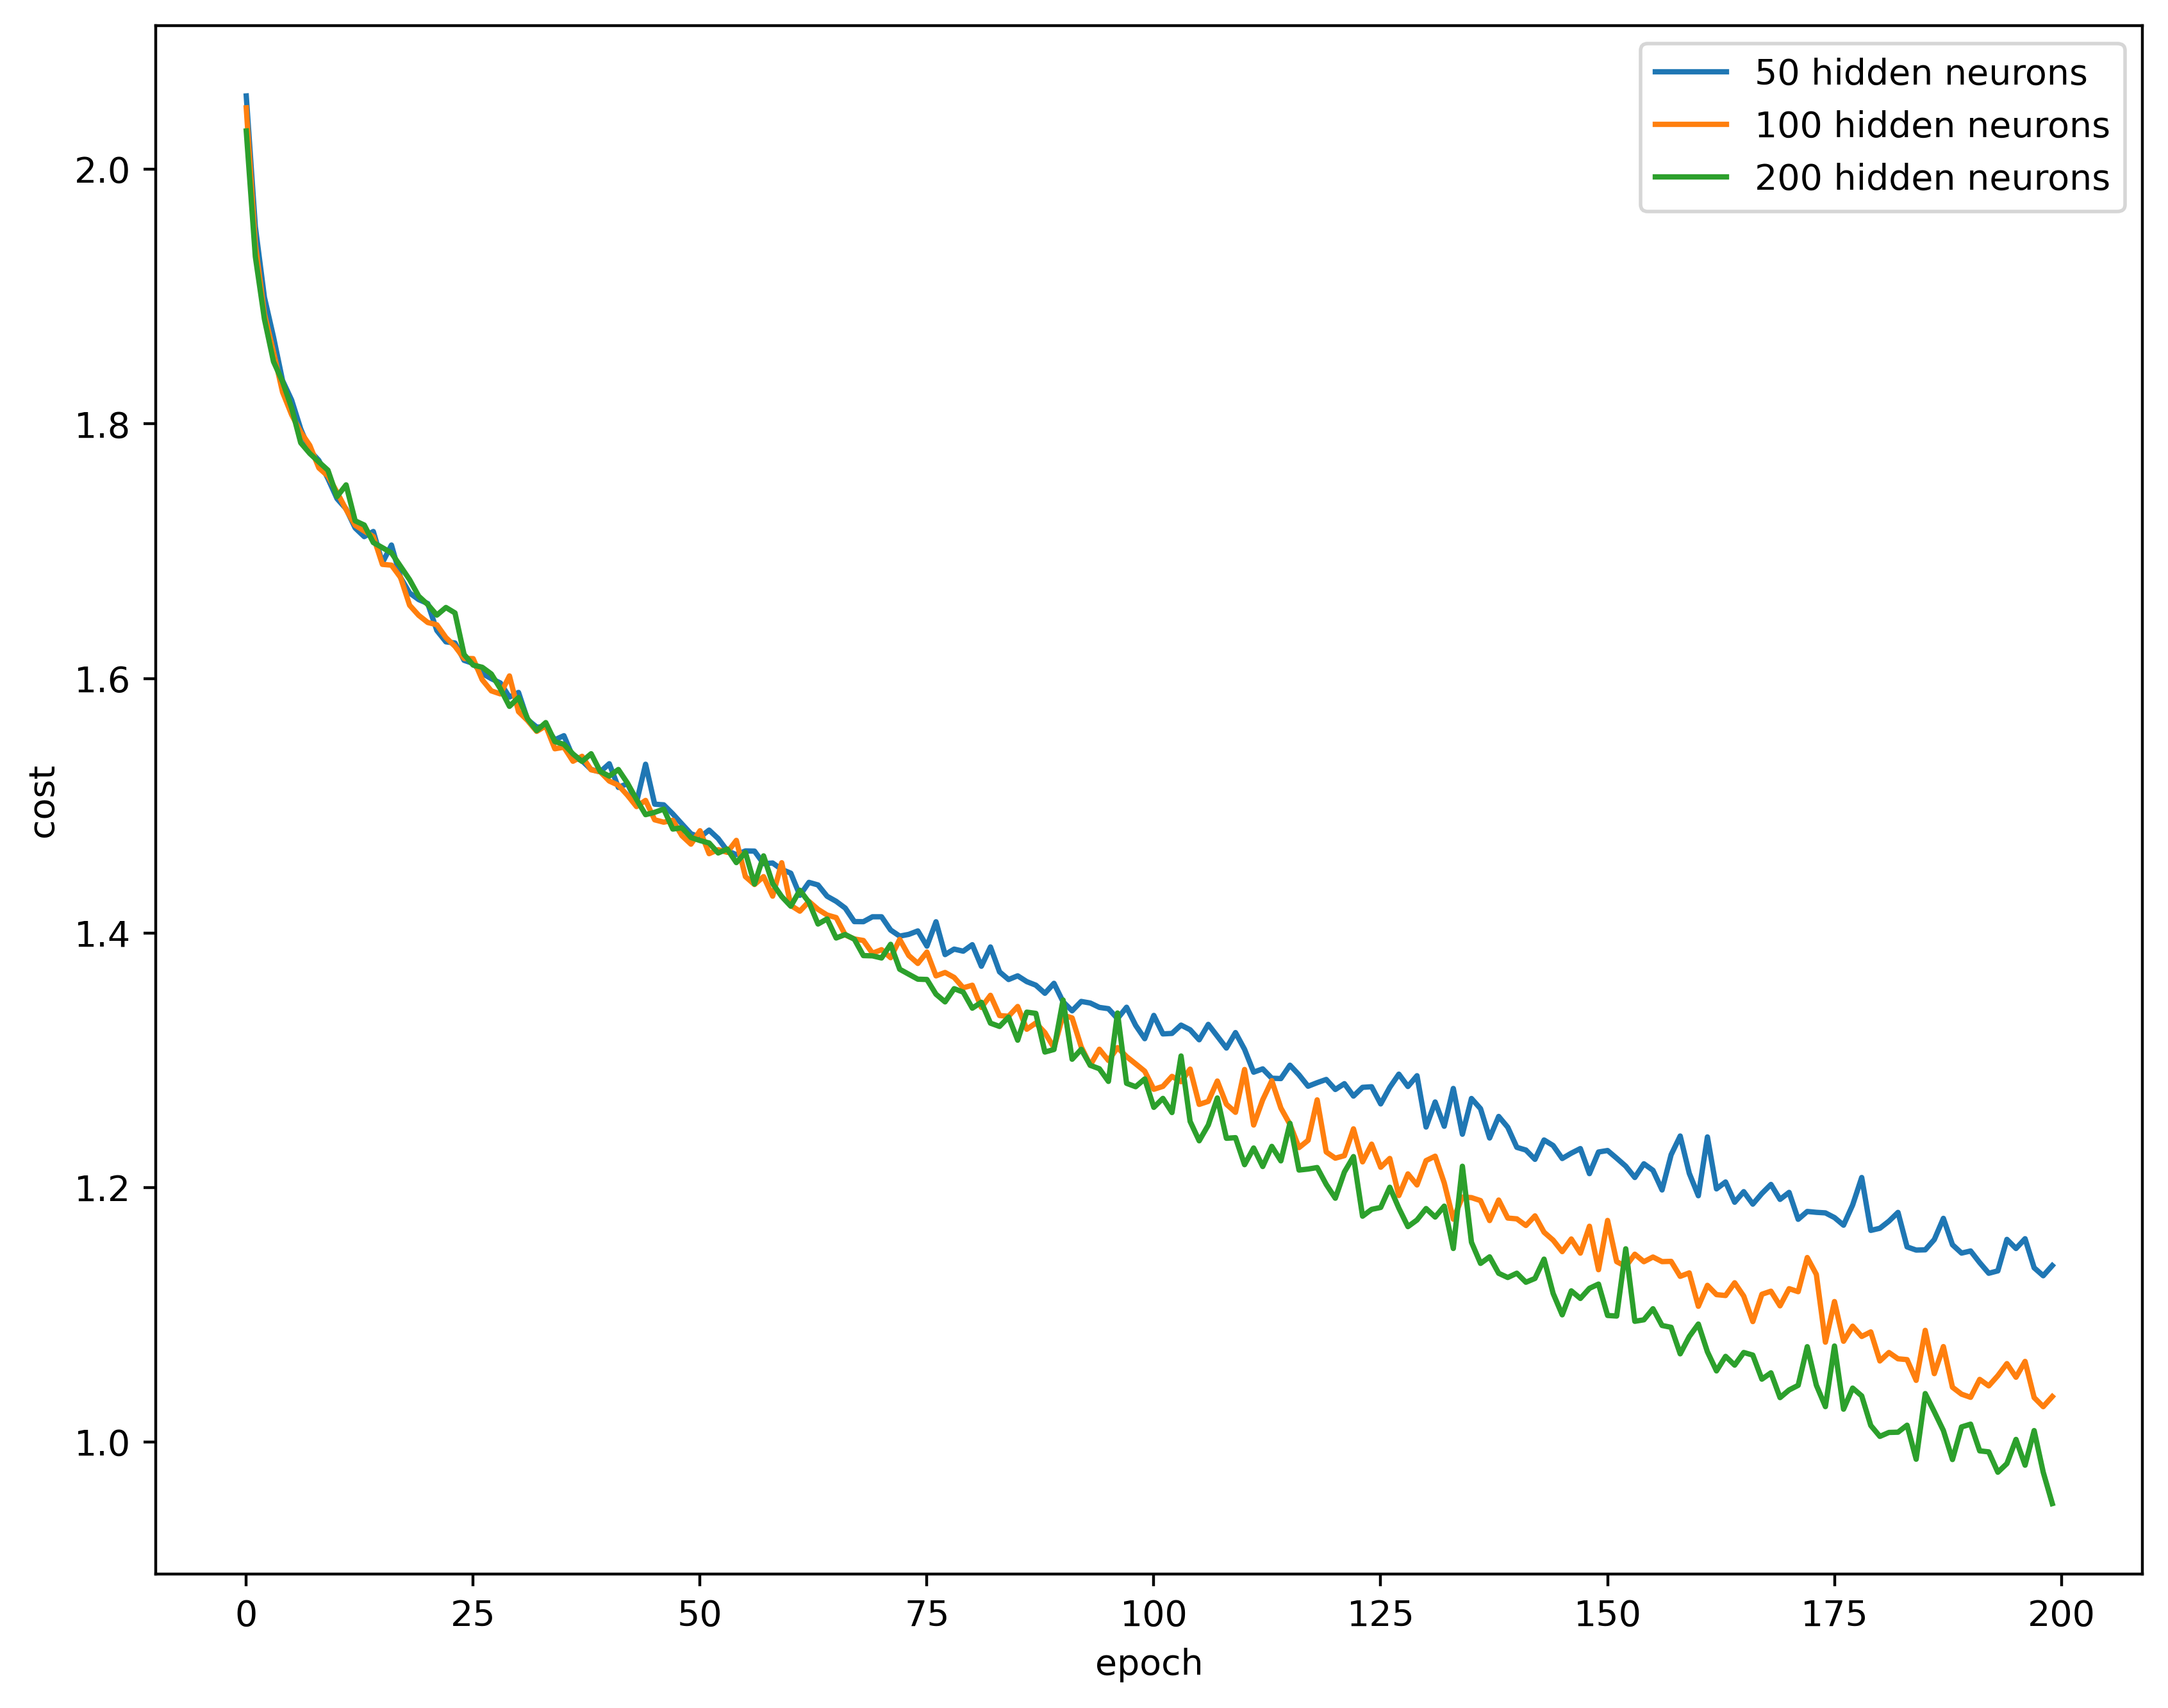

In [10]:
# Visualize results
epochs = np.arange(len(costs_0))
plt.figure(figsize=(10,8),dpi=400)
plt.plot(epochs, costs_0, label='50 hidden neurons')
plt.plot(epochs, costs_1, label='100 hidden neurons')
plt.plot(epochs, costs_2, label='200 hidden neurons')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.legend(loc='best')
plt.savefig('figure_1.png')

**TODO**: Evaluate your model

## Evaluate

After a long time trainning on my local machine, at epoch 199 (200th) the result for each model:

|      | 50 hiden neurons | 100 hiden neurons | 200 hiden neurons |
| ---- | ---------------- | ----------------- | ----------------- |
| cost | 1.139            | 1.036             | 0.952             |
| err  | 39.657%          | 35.687%           | 32.057%           |

from this table, and the saved plot of cost funtion:

![](https://i.imgur.com/Ga8rZNC.png)

Compare with the learning rate parameters finetuning of Stanford CS231n Slide([1])
![](https://i.imgur.com/hqi9ktO.png)

We can see that our learning rate 0.01 is a good learning rate for 3 models. With a little gap between each model, this experiment show that the more hidden neurons, the more better model but in practicice it may not true([2]).

In the error rate of model, (also related to the loss value) it have some necklace when trainning. This problem may happen due to the local minima point of search space. By Stanford CS231n Slide([1]), and as we have learned in class, this problem can be solve by using Momentum([3]) ~ this can boost up the model to better global minima base on keep the previous slope affecting the learning weight update. 

## References:
[1]: Stanford CS231N, Fei-Fei Li & Justin Johnson & Serena Yeung, Lecture 06-07: Training Neural Networks.

[2]: [Development of a Neural Network-Based ObjectDetection for Multirotor Target Tracking](https://openprairie.sdstate.edu/cgi/viewcontent.cgi?article=4213&context=etd)

[3]: [SGD with Momentum](https://paperswithcode.com/method/sgd-with-momentum)

([4]): Machine Learning from Scratch, By Danny Friedman https://dafriedman97.github.io/mlbook/content/c7/concept.html

*Note*: In this assignment, I've change somethings of your template to make it runable on my Linux machine:

- override the unpickle function (load it with latin1 encoder).
- change the path backslash (\\) type of windows to slash (/) type of Linux.
- fill up the updateWeights function.

****
<center><b> Have a good day ❤️ </b></center>
